UNIVARIATE DATASET:

    X       Y

    0      0.2

    0.5    0.78

    1      0.89

    1.5    1.2

    2      2.2

    2.5    2.5

    3      2.789

    3.5    4.3


In [ ]:
import numpy as np, pandas as pd 
import matplotlib.pyplot as plt
#import dataset manually
x_data=pd.DataFrame(np.array([0,0.5,1,1.5,2,2.5,3,3.5]))
y_data=pd.DataFrame(np.array([ 0.2, 0.78,  0.89, 1.2, 2.2, 2.5, 2.789,4.3]))

In [ ]:
 def polynomial_features(x_data,degree=2):
  x_features = x_data 
  m = x_features.shape[0]
  n = x_features.shape[1]
  ones = np.ones(m)
  col_count = n
  for cols in x_features.columns:
   for i in range(1,degree+1):
    x_features[col_count] = x_features[cols]**(i+1)
    col_count +=1
  x_features.insert(0,'ones',ones)
  return x_features
X_data=pd.DataFrame(polynomial_features(x_data,4))
X_data

,ones,0,1,2,3,4
0,1.0,0.0,0.00,0.000,0.0000,0.00000
1,1.0,0.5,0.25,0.125,0.0625,0.03125
2,1.0,1.0,1.00,1.000,1.0000,1.00000
3,1.0,1.5,2.25,3.375,5.0625,7.59375
4,1.0,2.0,4.00,8.000,16.0000,32.00000
5,1.0,2.5,6.25,15.625,39.0625,97.65625
6,1.0,3.0,9.00,27.000,81.0000,243.00000
7,1.0,3.5,12.25,42.875,150.0625,525.21875


In [ ]:
def polynomial_regression(x_features,y_response,lambda_val):
  L = pd.DataFrame(lambda_val * np.identity(x_features.shape[1]))
  Xsq = x_features.T.dot(x_features)
  # Normal equation is inv(X'X + lambda*L) * X'Y
  # the regulation is usually not done on theta 0 and the first element of it is set to 0 
  # but here it affects the score hence theta0 is regularised too
  theta = np.linalg.pinv(Xsq.values + L.values).dot(x_features.T.dot(y_response))
  return theta
res=polynomial_regression(x_data, y_data,3)

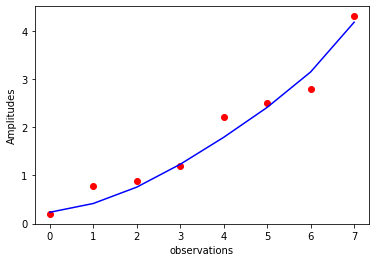

In [ ]:
Yp = X_data.dot(res)
plt.plot(np.arange(Yp.shape[0]), Yp,color='b')
plt.scatter(np.arange(Yp.shape[0]), y_data,color='r')
plt.xlabel("observations")
plt.ylabel("Amplitudes")
plt.show()